# K-Means Clustering (Penguins Prediction)

## Penjelasan Kolom

###
- culmen_length_mm = Panjang paruh penguin dalam satuan milimeter (mm).
- culmen_depth_mm = Kedalaman paruh penguin dalam satuan milimeter (mm).
- flipper_length_mm = Panjang sirip penguin dalam satuan milimeter (mm).
- body_mass_g = Berat badan penguin dalam satuan gram (g).
- sex = Jenis kelamin penguin, terdiri dari FEMALE (0) dan MALE (1) sebagai kelas target.

![PenguinLucu](penguinslucu.jpg)

## A. Data Preparation

### A.1 Import Libraries

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [189]:
try:
    df = pd.read_csv("penguinslucu.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [190]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [191]:
df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


### A.4 Melihat Informasi Data

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


### A.5 Melihat Dimensi Data

In [193]:
df.shape

(344, 5)

### A.6 Cek Data Duplikat

In [194]:
df.duplicated().sum()

np.int64(1)

In [195]:
df.drop_duplicates(inplace=True)

In [196]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [197]:
df.isna().sum()

culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

In [198]:
df.dropna(inplace=True)

In [199]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [200]:
df = df.reset_index(drop=True)

### A.8 Cek Statistik Data

In [201]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,335.00,43.99,5.45,32.10,39.50,44.50,48.55,59.60
culmen_depth_mm,335.00,17.17,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,335.00,214.36,263.25,-132.00,190.00,197.00,213.00,5000.00
body_mass_g,335.00,4209.18,803.63,2700.00,3550.00,4050.00,4787.50,6300.00


### A.9 Cek Outliers Data

<Figure size 1000x800 with 0 Axes>

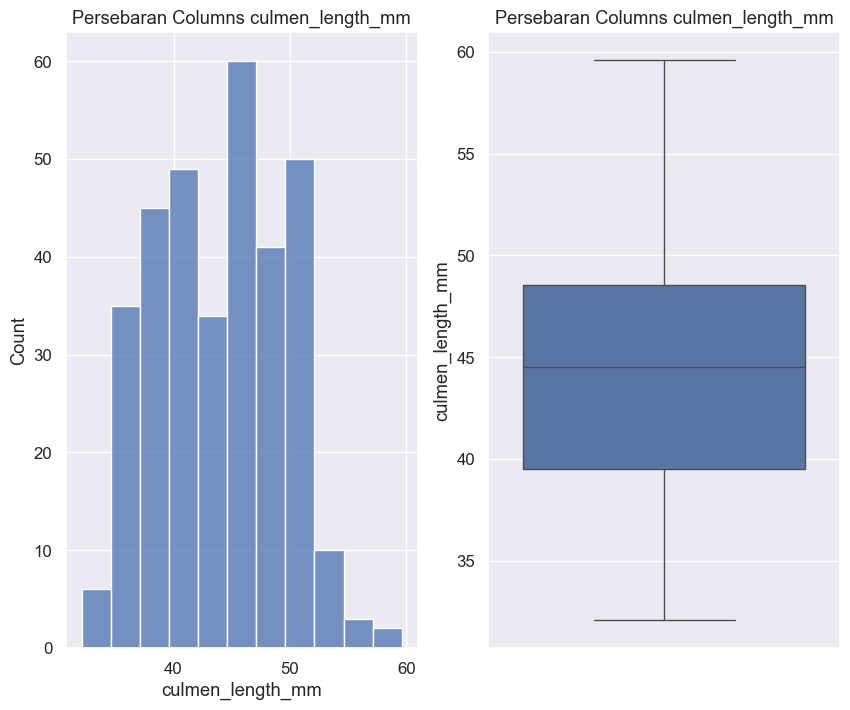

<Figure size 1000x800 with 0 Axes>

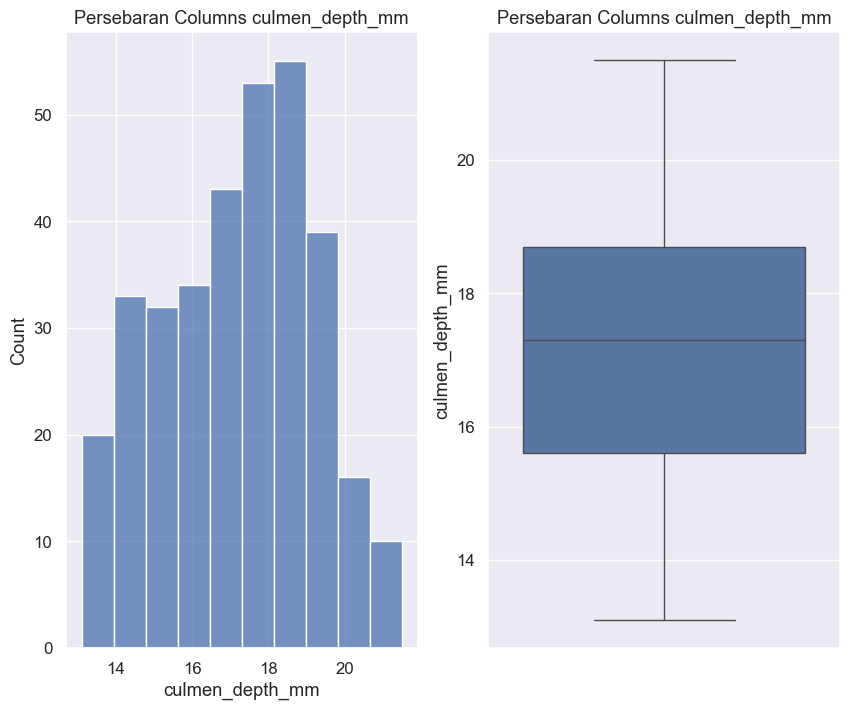

<Figure size 1000x800 with 0 Axes>

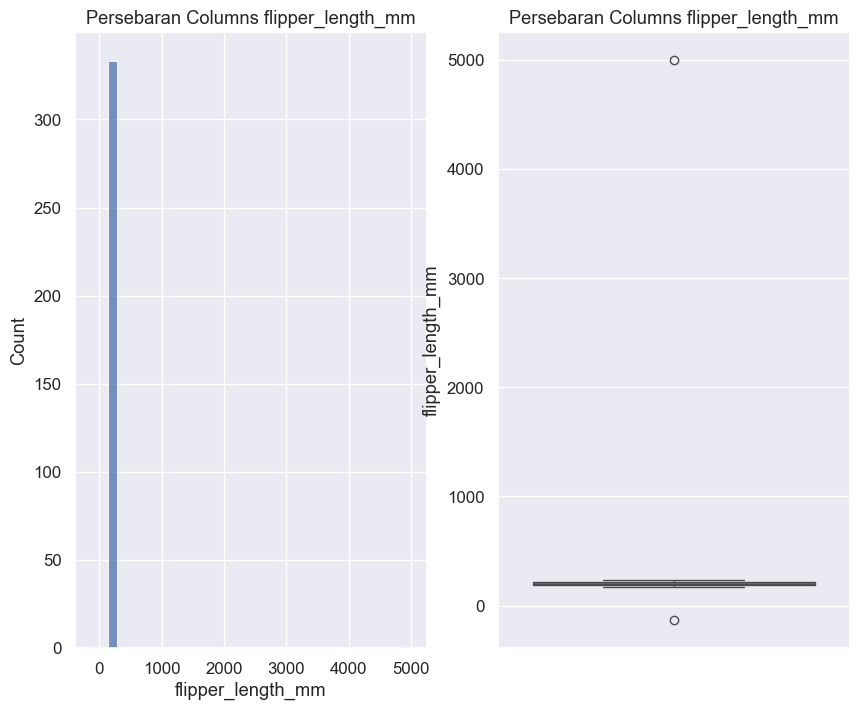

<Figure size 1000x800 with 0 Axes>

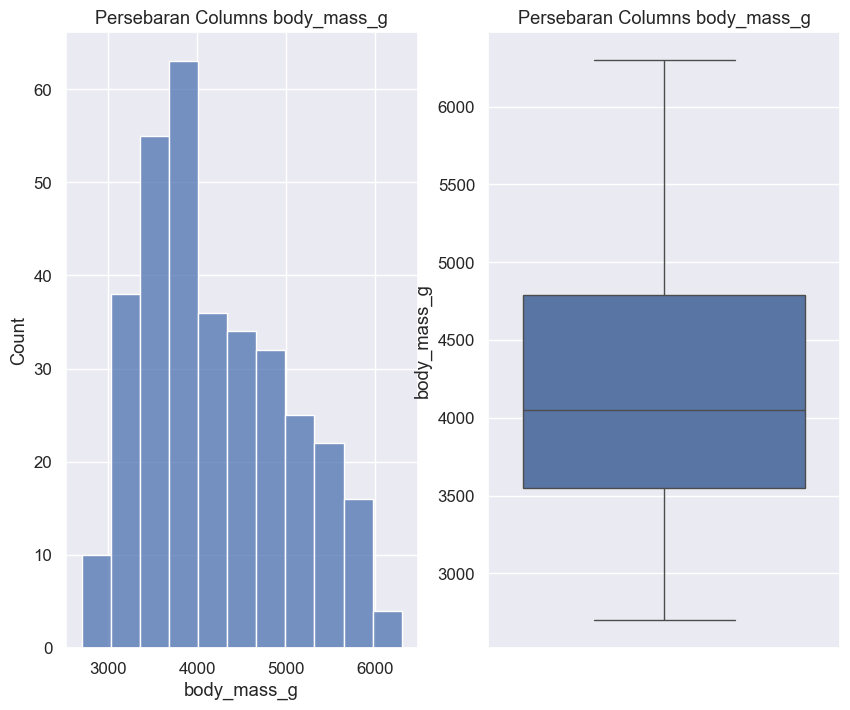

In [202]:
for col in df.select_dtypes(include='number'):
 plt.figure(figsize=(10, 8))
 fig, axes = plt.subplots(1, 2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")


## B. Exploratory Data Analysis (EDA)

### B.1 Univariate Analysis

In [203]:
kelamin_mapping = {'MALE' : 0, 'FEMALE' : 1, '.' : 1}
df['sex'] = df['sex'].map(kelamin_mapping)

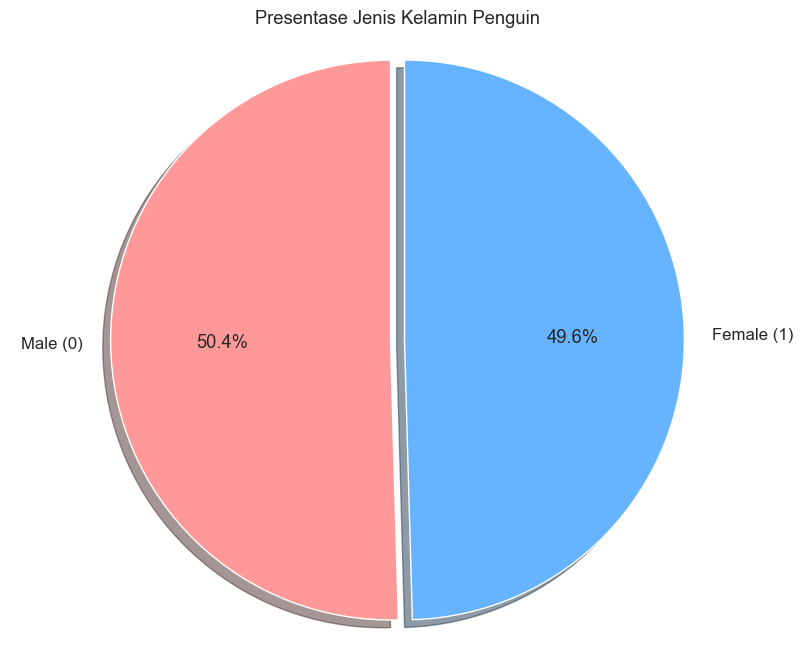

In [204]:
KelaminPenguin = df['sex'].value_counts()

label = ['Male (0)', 'Female (1)']

plt.figure(figsize=(10, 8))
plt.pie(KelaminPenguin,
        labels=label,
        autopct = '%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff'],
        explode=(0.05, 0),
        shadow= True) 

plt.title("Presentase Jenis Kelamin Penguin")
plt.axis('equal')
plt.show()

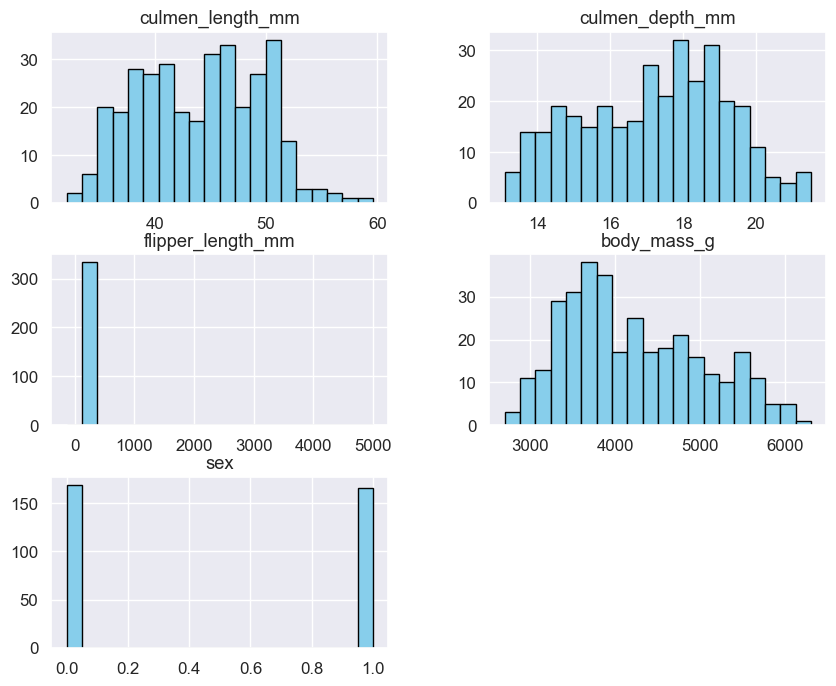

In [205]:
num = df.select_dtypes(include='number')

num.hist(bins = 20, edgecolor = 'black', color='skyblue', figsize=(10, 8))
plt.show()

### B.2 Bivariate Analysis

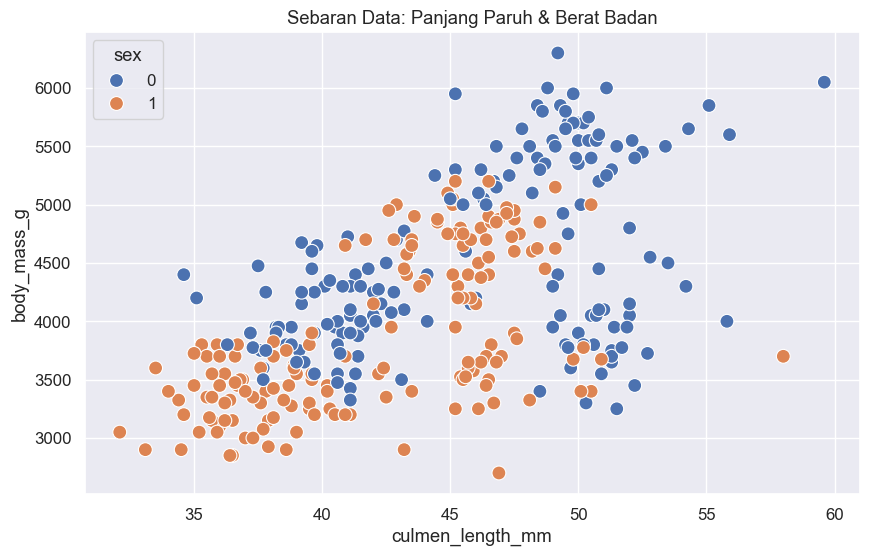

In [206]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='culmen_length_mm', y='body_mass_g', hue='sex', s=100)
plt.title("Sebaran Data: Panjang Paruh & Berat Badan")
plt.show()

### B.3 Multivariate Analysis

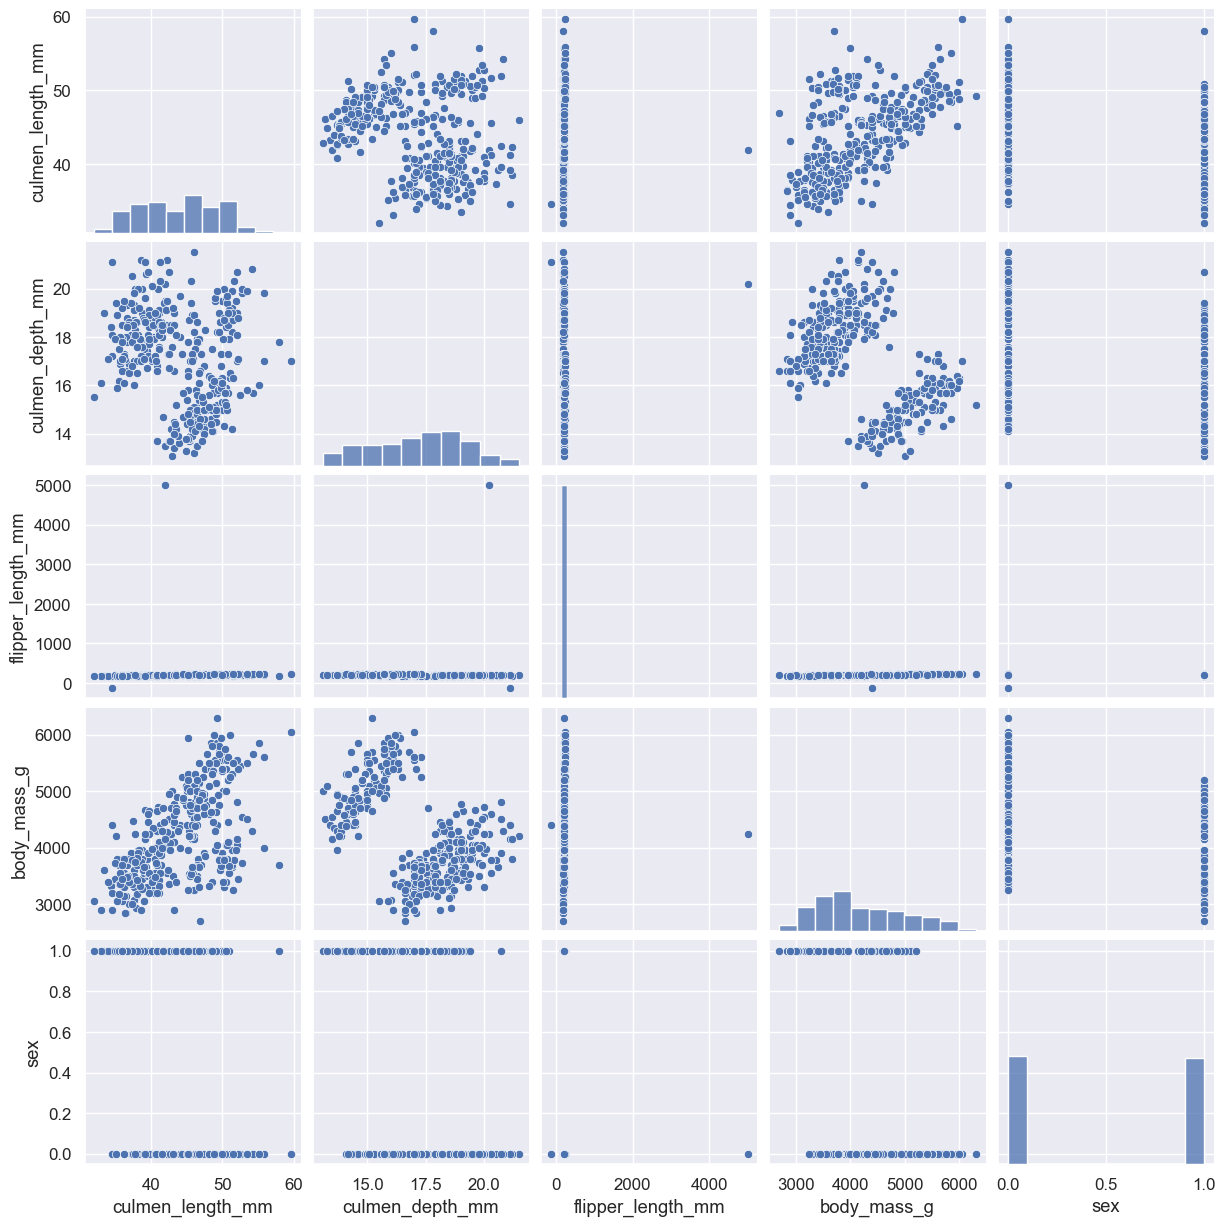

In [207]:
sns.pairplot(df)

<Axes: >

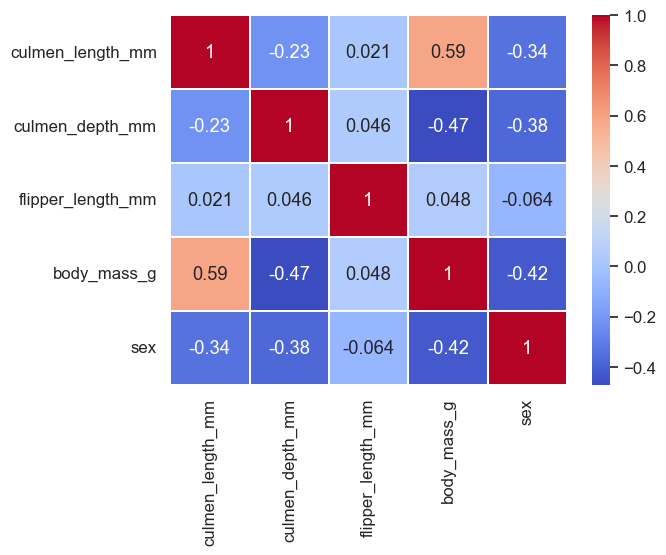

In [208]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)

## C. Data Preprocessing

### C.1 Encoding Label

In [209]:
# kelamin_mapping = {'MALE' : 0, 'FEMALE' : 1}
# df['sex'] = df['sex'].map(kelamin_mapping)
# df['sex']

### C.2 Handling Outliers

In [210]:
df['flipper_length_mm'] = df['flipper_length_mm'].clip(170, 230)

### C.3 Standardize Features

In [211]:
features = df.drop(columns='sex')

In [212]:
features = (features - features.mean(axis=0)) / features.std(axis=0)

### C.4 Principal Component Analysis (PCA)

In [213]:
def pca_manual(X, n_components=2):
    # LANGKAH 1: Covariance Matrix
    # rowvar=False artinya: kolom kita adalah fitur (bukan baris)
    cov_matrix = np.cov(X, rowvar=False)
    
    # LANGKAH 2: Eigen Values & Vectors (Jantungnya PCA)
    values, vectors = np.linalg.eig(cov_matrix)
    
    # LANGKAH 3: Urutkan variansi dari yang terbesar (ambil yang terbesar)
    sorted_index = np.argsort(values)[::-1]  # [::-1] urut besar ke kecil
    sorted_vectors = vectors[:, sorted_index]
    
    # LANGKAH 4: Ambil 2 vektor teratas & Proyeksikan
    subset_vectors = sorted_vectors[:, :n_components]
    X_reduced = np.dot(X, subset_vectors)
    
    return X_reduced, sorted_vectors

In [214]:
X_pca, sorted_vectors = pca_manual(features)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [215]:
df_pca

,PC1,PC2
0,1.844291,0.028649
1,1.310547,-0.446056
2,1.375899,-0.162030
3,1.884497,-0.012524
4,1.915565,0.815641
...,...,...
330,-1.987058,-0.977297
331,-1.821436,-0.784716
332,-2.737747,0.265528
333,-1.703920,-0.726382


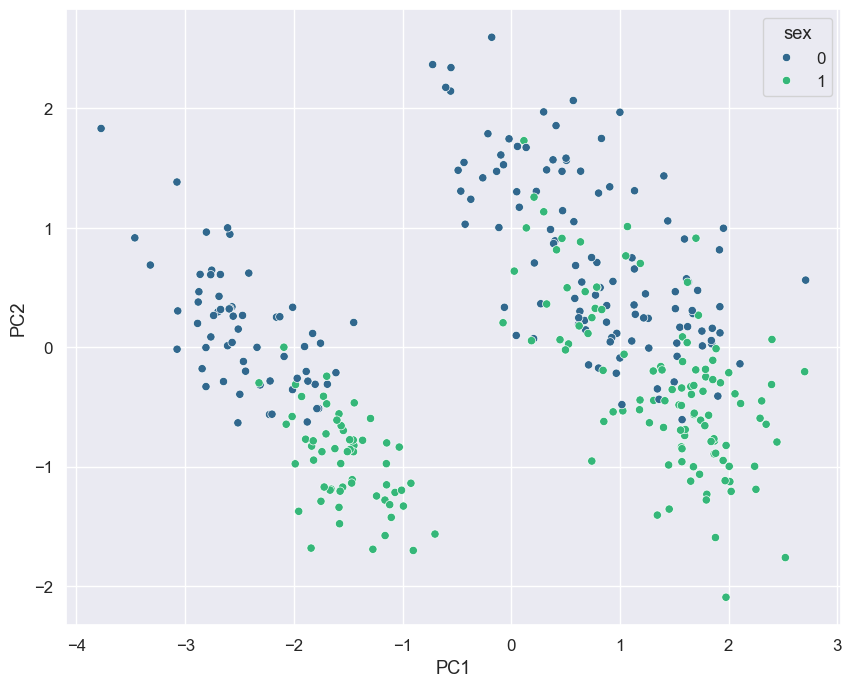

In [216]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df['sex'], palette='viridis')
plt.show()

## D. Modelling

### D.1 K-Means Clustering 🤯🤯🤯🤯🤯

#### K-Means (Iteration & Convergention)

In [217]:
def kmeans(df, k, max_iter=100, tol=1e-4):
    X = df.values 
    
    idx_acak = np.random.choice(len(X), k, replace=False)
    centroids = X[idx_acak]
    
    for i in range(max_iter):
        euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
        
        labels = np.argmin(euclid, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
            
        centroids = new_centroids
        
    return labels, centroids

#### Calculate Within-Cluster Sum of Squares (WCSS)

In [218]:
def calc_wcss(df, k):
    clusters, centroids = kmeans(df, k)
    
    X = df.to_numpy()
    euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
    
    min_jarak = np.min(euclid, axis=1)
    wcss = np.sum(min_jarak ** 2) 
    
    return wcss

#### WCSS Accuracy

In [219]:
wcss = calc_wcss(df_pca, k=3)
wcss

np.float64(330.08223245749684)

#### Elbow Method (Finding Best K)

In [220]:
def elbow_method(df,maxk=10):
    wcss_values = []
    
    for k in range(1, maxk + 1):
        wcss = calc_wcss(df,k)
        wcss_values.append(wcss)
        
    plt.plot(range(1,maxk + 1),wcss_values, marker='o', linestyle='--')
    plt.title('Elbow Method untuk mencari K terbaik')
    plt.xlabel('Jumlah K (Cluster)')
    plt.ylabel('WCSS Error')
    plt.show()

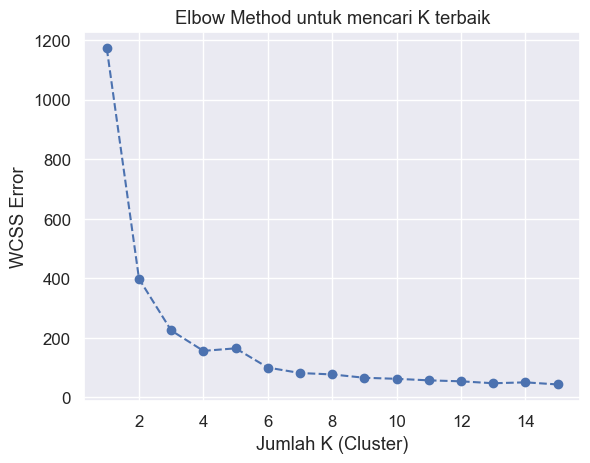

In [221]:
elbow_method(df_pca,15)

## E. Evaluasi

### E.1 Silhouette Score

#### Calculate Silhouette Score (SScore)

In [222]:
def calc_sscore(df, k):
    clusters, centroids = kmeans(df, k)
    sscore = []
    
    for i in range(len(df)):
        ci = clusters[i]
        
        samecp = df[clusters == ci].to_numpy()
        ai = np.mean(np.linalg.norm(samecp - df.iloc[i].to_numpy(), axis=1))
        
        distance_to_otherc = []
        for j in range(k):
            if j != ci:
                othercp = df[clusters == j].to_numpy()
                bi_temp = np.mean(np.linalg.norm(othercp - df.iloc[i].to_numpy(), axis=1))
                distance_to_otherc.append(bi_temp)
        
        bi = min(distance_to_otherc)
        
        sscore_i = (bi - ai) / max(ai, bi)
        sscore.append(sscore_i)
        
    avg_sscore = np.mean(sscore)
    
    return avg_sscore

In [223]:
silhouette = calc_sscore(df_pca, k=3)
silhouette

np.float64(0.5361499878639591)

#### Silhouette Score 

In [224]:
def sscore_method(df,maxk=10):
    sscore = []
    
    for k in range(2,maxk+1):
        score= calc_sscore(df,k)
        sscore.append(score)
        
    print(sscore)
        
    plt.plot(range(2,maxk+1), sscore, marker='o', linestyle='--')
    plt.title(f"Silhouette Score untuk setiap K")
    plt.xlabel('Jumlah K (Cluster)')
    plt.ylabel('Silhouette Score')
    plt.show()

[np.float64(0.6101368622375374), np.float64(0.5326018687520419), np.float64(0.48893559442753226), np.float64(0.47326502913020285), np.float64(0.4574583590071253), np.float64(0.41766832990441316), np.float64(0.4138523517091955), np.float64(0.4302081106492756), np.float64(0.3977374634905252)]


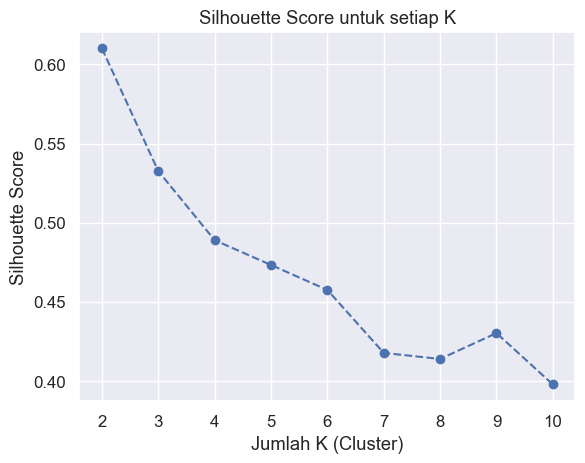

In [225]:
sscore_method(df_pca, maxk=10)

### E.2 Visualisasi Clusters

In [226]:
clusters,centroids = kmeans(df_pca,k=3)

df_pca['clusters'] = clusters
df_pca.head()

,PC1,PC2,clusters
0,1.844291,0.028649,2
1,1.310547,-0.446056,2
2,1.375899,-0.162030,2
3,1.884497,-0.012524,2
4,1.915565,0.815641,2


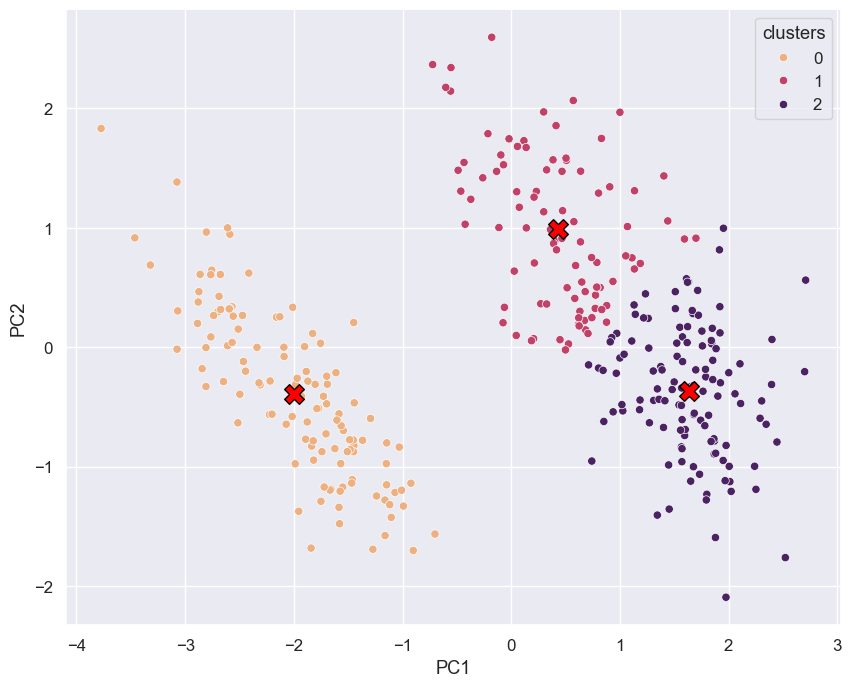

In [227]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='clusters', palette='flare')
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='X', s=200, 
    label='Centroids', 
    edgecolor='black'
)
plt.show()

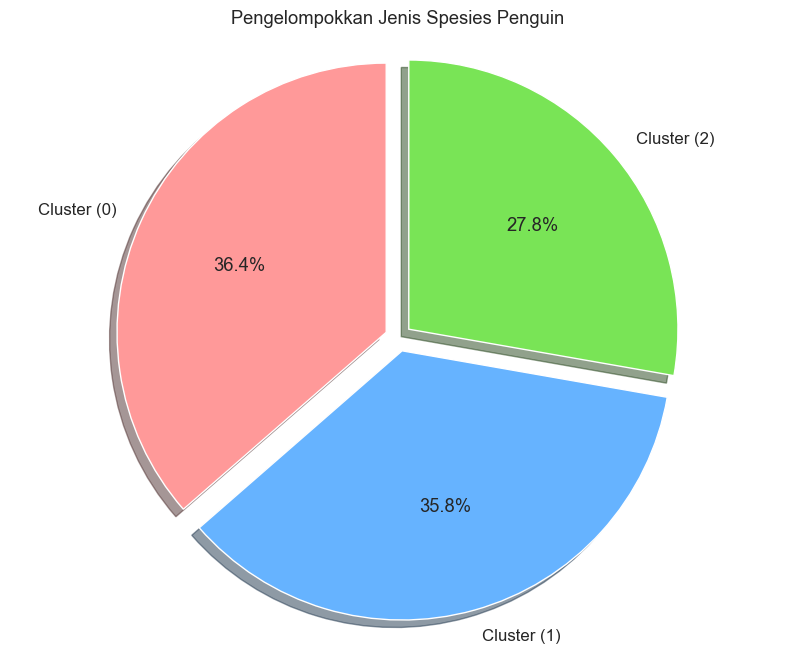

In [228]:
Clusters = df_pca['clusters'].value_counts()

label = ['Cluster (0)', 'Cluster (1)', 'Cluster (2)']

plt.figure(figsize=(10, 8))
plt.pie(Clusters,
        labels=label,
        autopct = '%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff', "#79e456"],
        explode=(0.05, 0.05, 0.05),
        shadow= True)

plt.title("Pengelompokkan Jenis Spesies Penguin")
plt.axis('equal')
plt.show()

In [229]:
df['cluster'] = clusters
df_final = df.groupby('cluster')[df.columns].mean()
df.head()   

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,0,2
1,39.5,17.4,186.0,3800.0,1,2
2,40.3,18.0,195.0,3250.0,1,2
3,36.7,19.3,193.0,3450.0,1,2
4,39.3,20.6,190.0,3650.0,0,2


In [230]:
spesies_mapping = {
    0: 'Gentoo (Badan Besar)',
    1: 'Adelie (Paruh Pendek)',
    2: 'Chinstrap (Paruh Panjang)'
}

df['species_name'] = df['cluster'].map(spesies_mapping)

In [231]:
df.tail(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster,species_name
315,47.2,15.5,215.0,4975.0,1,0,Gentoo (Badan Besar)
316,49.1,15.0,228.0,5500.0,0,0,Gentoo (Badan Besar)
317,46.8,16.1,215.0,5500.0,0,0,Gentoo (Badan Besar)
318,41.7,14.7,210.0,4700.0,1,0,Gentoo (Badan Besar)
319,53.4,15.8,219.0,5500.0,0,0,Gentoo (Badan Besar)
320,43.3,14.0,208.0,4575.0,1,0,Gentoo (Badan Besar)
321,48.1,15.1,209.0,5500.0,0,0,Gentoo (Badan Besar)
322,50.5,15.2,216.0,5000.0,1,0,Gentoo (Badan Besar)
323,49.8,15.9,229.0,5950.0,0,0,Gentoo (Badan Besar)
324,43.5,15.2,213.0,4650.0,1,0,Gentoo (Badan Besar)


## F. GUI

### F.1 Rumus Utama Jarak Euclid

In [232]:
# data_baru = "tes"
# jarak = np.linalg.norm(centroids - data_baru, axis=1)
# cluster_terpilih = np.argmin(jarak)

### F.2 GUI Tkinter

In [233]:
import tkinter as tk
from tkinter import *

kolom_fitur = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
std_mean = df[kolom_fitur].mean(axis=0).to_numpy()
std_std = df[kolom_fitur].std(axis=0).to_numpy()

vector_pca = sorted_vectors[:, :2] 

centroids_jarak = centroids

def prediksi():
        cl = float(input_cl.get())
        cd = float(input_cd.get())
        fl = float(input_fl.get())
        bm = float(input_bm.get())  
        
        data_input = np.array([cl, cd, fl, bm])
        data_scaled = (data_input - std_mean) / std_std
        data_pca = np.dot(data_scaled, vector_pca)
        jarak = np.linalg.norm(centroids_jarak - data_pca, axis=1)
        
        cluster_terpilih = np.argmin(jarak)
        if cluster_terpilih == 0:
            teks_hasil = "Penguin Gentooooooo"
        elif cluster_terpilih == 1:
            teks_hasil = "Penguin Adelieeeeee"
        else:
            teks_hasil = "Penguin Chinstrappp"
        hasil_prediksi.config(text=f"{teks_hasil}")


# GUI UTAMA
root = tk.Tk()
root.title("K-Means Clustering - Penguin Species Prediction")
root.geometry("500x600")
root.config(bg="#1e3d59")

# Header
header = Frame(root, bg="#f5f0e1")
header.pack(fill=X)
Label(header, text="Penguin Predictor", font=('Arial', 18, 'bold',), fg='#1e3d59', bg="#f5f0e1").pack(pady=5)
Label(header, text="K-Means Clustering + PCA", font=('Arial', 12), fg='#1e3d59', bg="#f5f0e1").pack(pady=(0,5))

main = Frame(root, bg="#1e3d59")
main.pack(pady=20)

aturan = Frame(main, bg="#1e3d59")
aturan.pack()

Label(aturan, text="1. Culmen Length (mm) / Panjang Paruh", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(10,0))
input_cl = Entry(aturan, width=30)
input_cl.pack()

Label(aturan, text="2. Culmen Depth (mm) / Tebal Paruh", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(10,0))
input_cd = Entry(aturan, width=30)
input_cd.pack()

Label(aturan, text="3. Flipper Length (mm) / Panjang Sirip", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(10,0))
input_fl = Entry(aturan, width=30)
input_fl.pack()

Label(aturan, text="4. Body Mass (g) / Berat Badan", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(10,0))
input_bm = Entry(aturan, width=30)
input_bm.pack()

hasil = Frame(root, bg="#1e3d59")
hasil.pack(pady=30)

button = Button(hasil, text='PREDIKSI SPESIES', font=('Arial', 11, 'bold'), bg='#ff6e40', fg='white', command=prediksi)
button.pack(ipadx=10, ipady=5)

Label(hasil, text="Hasil Prediksi:", font=('Arial', 10), fg='white', bg="#1e3d59").pack(pady=(20,5))
hasil_prediksi = Label(hasil, text='-', font=('Arial', 16, 'bold'), fg='#ffc13b', bg="#1e3d59")
hasil_prediksi.pack()

root.mainloop()